EDA & Data Preprocessing on Google App Store Rating Dataset.

In [486]:
import pandas as pd 
import numpy as np 


data=pd.read_csv('Apps_data.csv')
data.head(3)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [487]:
data.shape

(10841, 13)

In [488]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [489]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [490]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns that need to be worked upon

In [491]:
data.select_dtypes(include='object').columns.tolist()

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [492]:
data.columns[data.isna().any()].to_list()

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [493]:
print(data.duplicated().sum())
print(data.shape)
data=data.drop_duplicates()


483
(10841, 13)


In [494]:
data.shape
print(data.head(2))

                                              App        Category  Rating  \
0  Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                             Coloring book moana  ART_AND_DESIGN     3.9   

  Reviews Size  Installs  Type Price Content Rating  \
0     159  19M   10,000+  Free     0       Everyone   
1     967  14M  500,000+  Free     0       Everyone   

                      Genres      Last Updated Current Ver   Android Ver  
0               Art & Design   January 7, 2018       1.0.0  4.0.3 and up  
1  Art & Design;Pretend Play  January 15, 2018       2.0.0  4.0.3 and up  


In [495]:
data['Category'].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [496]:
unique= data['Category'].unique()
unique

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [497]:
invalid=data[data['Category']=='1.9']
invalid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [498]:
data.drop(10472, inplace=True)
data.shape

(10357, 13)

In [499]:
data['Rating'].isnull().sum()


1465

In [500]:
if data['Rating'].isna().any():
    
    data = data.dropna(subset=['Rating'])

data.shape

(8892, 13)

In [501]:
def Rating_Category(value):
    if value <= 3.5:
        return "Low"
    elif value > 3.5:
        return "High"



In [502]:
data['Rating_Category']=data['Rating'].apply(Rating_Category)
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
7178,Nero AirBurn,VIDEO_PLAYERS,4.2,1008,1.7M,"100,000+",Free,0,Everyone,Video Players & Editors,"June 26, 2015",1.0.9,4.0 and up,High
9551,Learn to code with el Chavo,FAMILY,3.9,5933,60M,"1,000,000+",Free,0,Everyone,Educational,"March 27, 2018",2.6,4.1 and up,High
10800,FR Roster,TOOLS,4.1,174,12M,"5,000+",Free,0,Everyone,Tools,"July 30, 2018",6.04,4.4 and up,High
8814,DS video,VIDEO_PLAYERS,3.8,12443,Varies with device,"1,000,000+",Free,0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,High
4592,Telegram,COMMUNICATION,4.4,3128611,Varies with device,"100,000,000+",Free,0,Mature 17+,Communication,"July 27, 2018",Varies with device,Varies with device,High


In [503]:
distribution=data['Rating_Category'].value_counts()
distribution

High    8012
Low      880
Name: Rating_Category, dtype: int64

<Axes: >

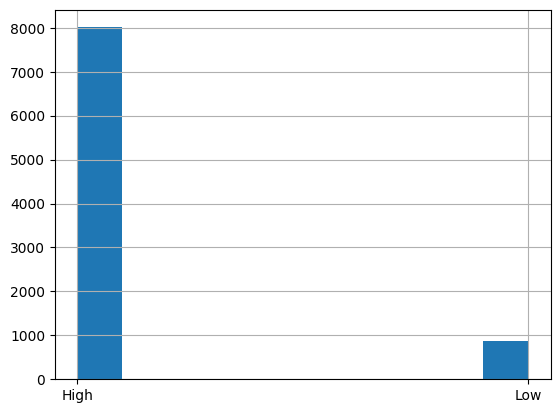

In [504]:
data['Rating_Category'].hist()

In [505]:
print(data['Reviews'].dtype) #before

data['Reviews']= data['Reviews'].astype('int64')

data['Reviews'].dtype #after conversion

object


dtype('int64')

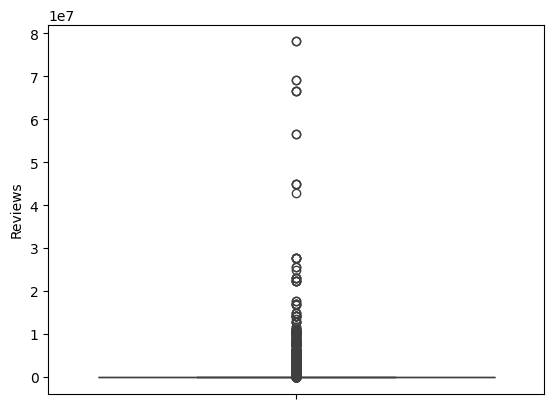

In [506]:
import seaborn as sns
fig=sns.boxplot(data['Reviews']) 

In [507]:
log10=np.log10(data['Reviews'])

log10.describe()

count    8892.000000
mean        3.576368
std         1.685149
min         0.000000
25%         2.214844
50%         3.673435
75%         4.852887
max         7.892975
Name: Reviews, dtype: float64

<Axes: ylabel='Reviews'>

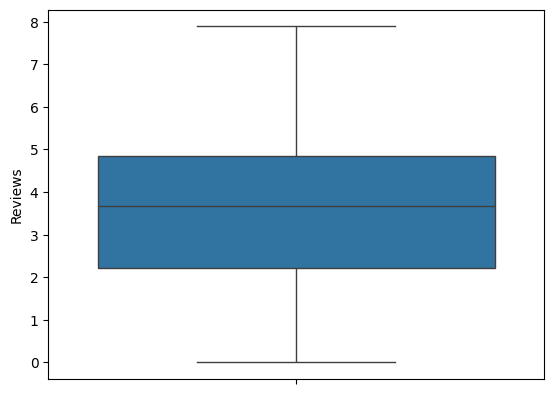

In [508]:
sns.boxplot(log10)

In [509]:
data['Reviews']=log10

In [510]:
data['Size'].value_counts()

Varies with device    1468
14M                    154
13M                    152
12M                    151
11M                    150
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 414, dtype: int64

In [511]:
data['Size']=data['Size'].apply(lambda x: x.replace(',',''))

In [512]:
data[data['Size']=='Varies with device'].index
    

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1468)

In [513]:
data.drop(data[data['Size']=='Varies with device'].index, inplace=True)


In [514]:
data.shape

(7424, 14)

In [515]:
data['Size'].sample(10)

9278     17M
4856     99M
5900    4.1M
4521    3.9M
8724     44M
7711    787k
884      17M
6046     21M
7683    801k
7229     62M
Name: Size, dtype: object

In [516]:

def convert(value):
    value=value.replace('M','*1000000')
    value=value.replace('k','*1000')
    return eval(value)


In [517]:
data['Size']=data['Size'].apply(convert)

In [518]:
data['Size'].dtype

dtype('float64')

In [519]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10833         1,000+
10834           500+
10836         5,000+
10837           100+
10840    10,000,000+
Name: Installs, Length: 7424, dtype: object

In [520]:
data['Installs']=data['Installs'].apply(lambda x:x.replace('+',''))
data['Installs']=data['Installs'].apply(lambda x:x.replace(',',''))

In [521]:
data['Installs']=data['Installs'].astype('int64')
data['Installs'].dtype

dtype('int64')

In [522]:
data['Price'].value_counts()

0          6877
$0.99       104
$2.99        98
$4.99        61
$1.99        53
           ... 
$6.49         1
$1.29         1
$299.99       1
$379.99       1
$1.20         1
Name: Price, Length: 68, dtype: int64

In [523]:
data['Price']=data['Price'].apply(lambda x:x.replace('$',''))

In [524]:
data['Price']=data['Price'].astype('float')

data['Price'].value_counts()

0.00      6877
0.99       104
2.99        98
4.99        61
1.99        53
          ... 
6.49         1
1.29         1
299.99       1
379.99       1
1.20         1
Name: Price, Length: 68, dtype: int64

In [525]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_Category
6498,BN Más Cerca de Usted,FINANCE,3.9,3.913019,45000000.0,500000,Free,0.0,Everyone,Finance,"July 6, 2018",5.1,4.4 and up,High
7742,ClanManagerTT2,FAMILY,4.7,1.740363,3300000.0,1000,Free,0.0,Everyone,Casual,"July 24, 2018",2.2.9,4.4 and up,High
9770,Open Heart Surgery Hospital ER: Crazy Doctor Sim,FAMILY,4.7,0.845098,25000000.0,1000,Free,0.0,Teen,Casual,"April 5, 2018",1.0,4.1 and up,High
6719,Block Strike,GAME,4.5,5.976586,60000000.0,10000000,Free,0.0,Teen,Action,"July 25, 2018",5.3.1,4.1 and up,High
2846,Photo Frames,PHOTOGRAPHY,4.3,4.456032,23000000.0,10000000,Free,0.0,Everyone,Photography,"July 28, 2018",6.21,4.0 and up,High


In [526]:
data=data.drop(columns=['Rating','App','Genres','Last Updated','Current Ver','Android Ver'])

In [527]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Category']=le.fit_transform(data['Category'])
data['Type']=le.fit_transform(data['Type'])
data['Content Rating']=le.fit_transform(data['Content Rating'])
data['Rating_Category']=le.fit_transform(data['Rating_Category'])



In [529]:
data.sample(5)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
4854,15,5.434843,13000000.0,10000000,0,0.0,1,0
9881,25,1.939519,2000000.0,10000,0,0.0,1,0
6019,25,1.968483,14000000.0,1000,0,0.0,1,0
6317,25,2.789581,175000.0,50000,0,0.0,1,0
8259,11,4.209247,88000000.0,1000000,0,0.0,1,0


In [530]:
data.dtypes

Category             int32
Reviews            float64
Size               float64
Installs             int64
Type                 int32
Price              float64
Content Rating       int32
Rating_Category      int32
dtype: object

In [539]:
le

LabelEncoder()

In [541]:
x=data.drop('Rating_Category', axis=1)
y=data['Rating_Category']

In [543]:
x

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,2.201397,19000000.0,10000,0,0.0,1
1,0,2.985426,14000000.0,500000,0,0.0,1
2,0,4.942058,8700000.0,5000000,0,0.0,1
3,0,5.333737,25000000.0,50000000,0,0.0,4
4,0,2.985426,2800000.0,100000,0,0.0,1
...,...,...,...,...,...,...,...
10833,3,1.643453,619000.0,1000,0,0.0,1
10834,11,0.845098,2600000.0,500,0,0.0,1
10836,11,1.579784,53000000.0,5000,0,0.0,1
10837,11,0.602060,3600000.0,100,0,0.0,1


In [544]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10833    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_Category, Length: 7424, dtype: int32

In [545]:
from sklearn.model_selection import train_test_split


In [550]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state=1)

In [551]:
x_train

,Category,Reviews,Size,Installs,Type,Price,Content Rating
8888,0,0.000000,2900000.0,100,0,0.00,1
1298,15,5.264019,57000000.0,5000000,0,0.00,1
6599,20,2.489958,5900000.0,10000,0,0.00,1
7328,30,2.328380,6100000.0,5000,1,3.99,1
5681,18,1.755875,5800000.0,10000,0,0.00,1
...,...,...,...,...,...,...,...
1522,17,2.731589,99000000.0,50000,0,0.00,1
7755,11,1.462398,37000000.0,1000,0,0.00,2
5978,11,0.000000,2000000.0,50,1,1.49,1
347,6,6.679963,11000000.0,500000000,0,0.00,1


In [552]:
x_test

,Category,Reviews,Size,Installs,Type,Price,Content Rating
5708,29,2.845718,7300000.0,100000,0,0.00,1
7215,11,2.559907,14000000.0,1000,1,2.99,2
1350,15,4.852901,49000000.0,1000000,0,0.00,1
5727,29,4.895583,6300000.0,1000000,0,0.00,1
5326,11,3.997910,3700000.0,100000,0,0.00,4
...,...,...,...,...,...,...,...
6351,29,3.066699,350000.0,100000,0,0.00,1
1634,18,3.493319,13000000.0,100000,0,0.00,1
9865,3,1.518514,37000000.0,1000,0,0.00,1
10396,11,5.345748,94000000.0,5000000,0,0.00,4


In [554]:
y_train

8888    0
1298    0
6599    0
7328    0
5681    0
       ..
1522    0
7755    0
5978    1
347     0
7698    0
Name: Rating_Category, Length: 5196, dtype: int32

In [555]:
y_test

5708     0
7215     0
1350     0
5727     0
5326     0
        ..
6351     0
1634     0
9865     0
10396    0
6550     0
Name: Rating_Category, Length: 2228, dtype: int32

In [556]:
from sklearn.preprocessing import StandardScaler
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7424 non-null   int32  
 1   Reviews          7424 non-null   float64
 2   Size             7424 non-null   float64
 3   Installs         7424 non-null   int64  
 4   Type             7424 non-null   int32  
 5   Price            7424 non-null   float64
 6   Content Rating   7424 non-null   int32  
 7   Rating_Category  7424 non-null   int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 406.0 KB


In [557]:
data

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_Category
0,0,2.201397,19000000.0,10000,0,0.0,1,0
1,0,2.985426,14000000.0,500000,0,0.0,1,0
2,0,4.942058,8700000.0,5000000,0,0.0,1,0
3,0,5.333737,25000000.0,50000000,0,0.0,4,0
4,0,2.985426,2800000.0,100000,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,1.643453,619000.0,1000,0,0.0,1,0
10834,11,0.845098,2600000.0,500,0,0.0,1,0
10836,11,1.579784,53000000.0,5000,0,0.0,1,0
10837,11,0.602060,3600000.0,100,0,0.0,1,0


In [559]:
scaler= StandardScaler()
scaler

StandardScaler()

In [561]:
data= scaler.fit_transform(data)
data

array([[-2.03766618, -0.67995305, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618, -0.19653147, -0.37330014, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-2.03766618,  1.0099001 , -0.59947486, ..., -0.06305842,
        -0.46322046, -0.35358018],
       ...,
       [-0.68621673, -1.0632313 ,  1.29100439, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [-0.68621673, -1.66608206, -0.81711468, ..., -0.06305842,
        -0.46322046, -0.35358018],
       [ 0.17379656,  1.41571255, -0.15992777, ..., -0.06305842,
        -0.46322046, -0.35358018]])

In [566]:
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7
0,-2.037666,-0.679953,-0.159928,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.373300,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.599475,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.096119,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.851254,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.944327,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.859789,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.291004,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.817115,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


In [568]:
data.columns=['Category','Reviews','Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Rating_Category']
data

,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Rating_Category
0,-2.037666,-0.679953,-0.159928,-0.168764,-0.282029,-0.063058,-0.463220,-0.35358
1,-2.037666,-0.196531,-0.373300,-0.158181,-0.282029,-0.063058,-0.463220,-0.35358
2,-2.037666,1.009900,-0.599475,-0.060990,-0.282029,-0.063058,-0.463220,-0.35358
3,-2.037666,1.251404,0.096119,0.910911,-0.282029,-0.063058,2.517665,-0.35358
4,-2.037666,-0.196531,-0.851254,-0.166820,-0.282029,-0.063058,-0.463220,-0.35358
...,...,...,...,...,...,...,...,...
7419,-1.669089,-1.023974,-0.944327,-0.168958,-0.282029,-0.063058,-0.463220,-0.35358
7420,-0.686217,-1.516228,-0.859789,-0.168969,-0.282029,-0.063058,-0.463220,-0.35358
7421,-0.686217,-1.063231,1.291004,-0.168872,-0.282029,-0.063058,-0.463220,-0.35358
7422,-0.686217,-1.666082,-0.817115,-0.168977,-0.282029,-0.063058,-0.463220,-0.35358


In [571]:
corr=data.corr()
corr

,Category,Reviews,Size,Installs,Type,Price,Content_Rating,Rating_Category
Category,1.000000,0.012251,-0.152245,-0.002578,0.025515,-0.014596,-0.113560,0.031806
Reviews,0.012251,1.000000,0.376145,0.312511,-0.168292,-0.037582,0.170282,-0.233627
Size,-0.152245,0.376145,1.000000,0.167032,-0.026503,-0.026820,0.200772,-0.095114
Installs,-0.002578,0.312511,0.167032,1.000000,-0.047166,-0.010622,0.044983,-0.055884
Type,0.025515,-0.168292,-0.026503,-0.047166,1.000000,0.223588,-0.034840,-0.002930
Price,-0.014596,-0.037582,-0.026820,-0.010622,0.223588,1.000000,-0.012819,0.004051
Content_Rating,-0.113560,0.170282,0.200772,0.044983,-0.034840,-0.012819,1.000000,-0.047954
Rating_Category,0.031806,-0.233627,-0.095114,-0.055884,-0.002930,0.004051,-0.047954,1.000000
